# OK Cupid Dataset

This dataset consist of a majority of catagorical veriables, there fore my approach to this will be: 

    1) preliminary data exploration
    2) data cleaning 
    3) filling in missing values
    4) encoding catagorical values
    
    5) unbiasing the data
        - the data is disproportionatly populated by people in their mid to late 20s
        - the magority of data is dominated by single people, which needs to be removed as it is not an outcome predictor
        - the sex colum need to be unbiased as there are more men than women. 
        
    6) Form Hypothesis 
        - We want to predict the statuse of some based on key characteristics, for example: 
            if the person is within specific age group
            if a person has particular interest and characteristics
            (this could be achieved through sorting data into specific groupings the examing the affect)
        - 
    


In [1]:
# Import libraries 

# Import data science libraries 
import pandas as pd
import re # regulate expression library 
import numpy as np

# Import data visualisation libraries
from matplotlib import pyplot as plt
import seaborn as sns

# import csv library
import csv

# Import data splitting librar
from sklearn.model_selection import train_test_split

#Import machine learning algorithm
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier

#Import metrics
from sklearn.metrics import accuracy_score

%matplotlib inline

In [2]:
# Load dataset direct from PC, importing form website would require a direct URL from the UCL website
balanced_okcupid = pd.read_csv('Desktop/Data Science Career Change/WIP Projects/WIP OK Cupid/OKCupid-Date-A-Scientist-Starter/OKCupid-Date-A-Scientist-Starter/profiles_cluster.csv',encoding='utf-8')


# Preliminary Data Exploration 

In [3]:
balanced_okcupid.head()

,essay0
0,about me:<br />\n<br />\ni would love to think...
1,i am a chef: this is what that means.<br />\n1...
2,"i'm not ashamed of much, but writing public te..."
3,i work in a library and go to school. . .
4,hey how's it going? currently vague on the pro...


Conclusion 

# Data Cleaning, Wrangling and Tidying 

Preliminary data cleaning

In [4]:
# From priliminary observation I cannot detect any duplicate rows 
# the .drop_duplicates() function removes duplicate rows
balanced_okcupid = balanced_okcupid.drop_duplicates() 

# Total number of rows
total_rows = len(balanced_okcupid)

# Number of unique rows
unique_rows = len(balanced_okcupid.drop_duplicates())

# Number of duplicate rows
duplicate_rows = total_rows - unique_rows

# Print the number of duplicates
print("Number of duplicate rows:", duplicate_rows)


Number of duplicate rows: 0


In [5]:
# it looks like all of the data is in lowercase, however I will scan the data to make sure.
balanced_okcupid.columns = map(str.lower, balanced_okcupid.columns)

In [6]:
# axis=1` refers to the columns, `axis=0` would refer to the rows
# In the dictionary the key refers to the original column name and the value refers to the new column name {'oldname1': 'newname1', 'oldname2': 'newname2'}
#balanced_okcupid = balanced_okcupid.rename({'essay0': 'about_me'})

# the .head(10) function will show us the first 10 rows in our dataset
#balanced_okcupid.head(0)

In [7]:
balanced_okcupid.columns

Index(['essay0'], dtype='object')

In [8]:
# Observing the datasets data types
balanced_okcupid.dtypes
# There are three types of variable, interger, object and floats but no bolean variables

essay0    object
dtype: object

We see that our data consists of lots of different appearance which cannot be correct and may require some generalisation, as well as in other catagores. From initial inspection of the dataset there where some missing or NaN data but this does not appear. Therefore it may be usful to explore if there are correlation between the person type, habbits and body type or locaton etc...



In [9]:
# Find the number of unique values in the dataframe

unique_counts = balanced_okcupid.nunique()

print(unique_counts)

essay0    54352
dtype: int64


In [10]:
# String Parsing

# We need to reduce the amount of unique values with the free-text columns to...
    #1) remove unnecessary information reges
    #2) tokenisation
    

balanced_okcupid.essay0 = balanced_okcupid['essay0'].replace (r'\b(to|would|that|a|i|you|have|really|love|about|as|my|of|for|m|was|in|href|http|www|com|facebook|aaronrscott|sk|are|and|the|an|ve|ll|be|s|it)\b|<br\s*/?>|\'|"|=|:|/|<|>', '', regex=True)


#print(okcupid.body_type[2])
unique_counts = balanced_okcupid.nunique()
print(unique_counts)

essay0    54344
dtype: int64


# Remove missing values

In [11]:
# Removing Duplicates

duplicates = balanced_okcupid.duplicated()
print(duplicates.head())
print(duplicates.value_counts())
okcupid = balanced_okcupid.drop_duplicates()
duplicates = balanced_okcupid.duplicated()
print(duplicates.head())
print(duplicates.value_counts())

# Therefore we can observe that there are no duplicates

0    False
1    False
2    False
3    False
4    False
dtype: bool
False    54345
True         8
dtype: int64
0    False
1    False
2    False
3    False
4    False
dtype: bool
False    54345
True         8
dtype: int64


In [12]:
# To replace NaN values in all columns of a DataFrame, you can use the .fillna() method. Here’s how to do it for all 31 columns:

# Replace NaN values in all columns with a specific value, e.g., 0
#df = df.fillna(0)

# To replace NaN values in a specific column called job, use the .fillna() method on that column. Here’s how:

# Replace NaN values in the 'job' column with a specific value, e.g., 'Unknown'


balanced_okcupid['essay0'] = balanced_okcupid['essay0'].fillna('undisclosed')


In [13]:
# counts the number of missing values in each column 
balanced_okcupid.isna().sum() 

# We see that there are missing values in most colums and from an initial inspection these are empty boxes


essay0    0
dtype: int64

## Transforming the data 



In [14]:
# using nominal encoding 

balanced_okcupid['essay0'] = balanced_okcupid['essay0'].astype('category')


balanced_okcupid.dtypes

essay0    category
dtype: object

In [15]:
balanced_okcupid.dtypes

essay0    category
dtype: object

In [16]:
balanced_okcupid.head()

,essay0
0,me\n\n think some some kind intellectu...
1,am chef this is what means.\n1. am workah...
2,"not ashamed much, but writing public text on..."
3,work library go school. . .
4,hey how going? currently vague on profile k...


In [17]:
print(balanced_okcupid.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54353 entries, 0 to 54463
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   essay0  54353 non-null  category
dtypes: category(1)
memory usage: 3.1 MB
None


# KMeans Clustering 

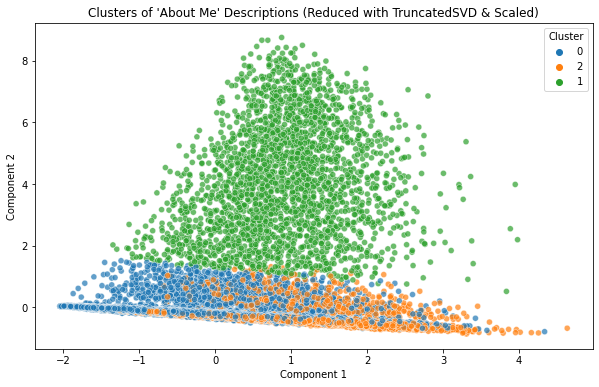

In [18]:

'''
1. Reduce Dimensionality
Use TruncatedSVD instead of PCA for dimensionality reduction on sparse matrices.

Limit the number of features in TfidfVectorizer (max_features=50000, for example).

2. Use Sparse Matrices Efficiently
Convert the TF-IDF matrix to a sparse format (scipy.sparse).

Instead of .toarray(), try .todense() or work directly with the sparse representation.

3. Optimize Clustering
Reduce the number of clusters (n_clusters).

Use MiniBatchKMeans, which is designed for large datasets.
'''

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import MiniBatchKMeans
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Convert text to numerical features using TF-IDF with max_features limit
vectorizer_about_me = TfidfVectorizer(stop_words='english', max_features=50000)
about_me_tfidf = vectorizer_about_me.fit_transform(balanced_okcupid['essay0'])

# Apply MiniBatchKMeans for efficient clustering
kmeans_about_me = MiniBatchKMeans(n_clusters=3, random_state=42, batch_size=500)
balanced_okcupid['about_me_cluster_labels'] = kmeans_about_me.fit_predict(about_me_tfidf)

# Reduce dimensions using TruncatedSVD
svd_about_me = TruncatedSVD(n_components=2, random_state=42)
reduced_about_me = svd_about_me.fit_transform(about_me_tfidf)

# Standardize components for better visualization
reduced_about_me = StandardScaler().fit_transform(reduced_about_me)

# Create scatter plot for "About Me" clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=reduced_about_me[:, 0], y=reduced_about_me[:, 1], 
                hue=balanced_okcupid['about_me_cluster_labels'].astype(str), 
                palette='tab10', alpha=0.7)
plt.title("Clusters of 'About Me' Descriptions (Reduced with TruncatedSVD & Scaled)")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.legend(title="Cluster")
plt.show()





In [19]:
balanced_okcupid = balanced_okcupid.sample(n=10000, random_state=42)


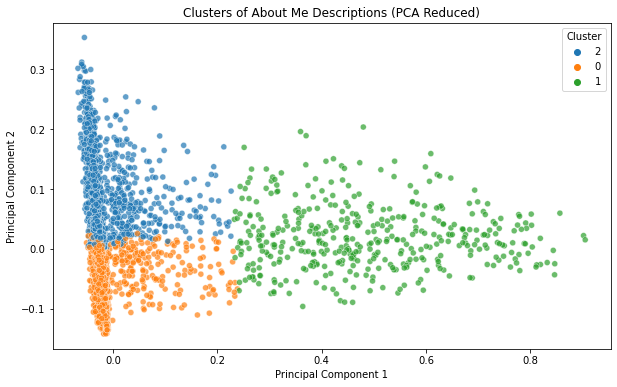

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Convert text to numerical features using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
about_me_tfidf = vectorizer.fit_transform(balanced_okcupid['essay0'])

# Apply k-means clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
balanced_okcupid['about_me_cluster_labels'] = kmeans.fit_predict(about_me_tfidf)


# Reduce dimensions for visualization
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(about_me_tfidf.toarray())

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=reduced_features[:, 0], y=reduced_features[:, 1], 
                hue=balanced_okcupid['about_me_cluster_labels'].astype(str), palette='tab10', alpha=0.7)
plt.title("Clusters of About Me Descriptions (PCA Reduced)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.show()


# Clustering the free-test using kmeans

Now that the free text columns have been encoded it may be usful find common patters through clustering to which will 
help in reducing dimentionality later on. 

Pre-Kmean Visualisation 

In [21]:
balanced_okcupid.head(10)

,essay0,about_me_cluster_labels
3954,currently re-calibrating. therapy grad school...,2
46996,"am easily entertained free flowing,\n sf nat...",0
17720,curious open minded person. been through l...,2
5430,"am bit meddler, fingers many pots, li...",0
890,"classilink interests?foodfood, food\nneeds ...",1
6183,honest with nothing hide.\ndont take myself s...,2
431,+ sf native\n+ night owl\n+ pop culture enthus...,0
38986,am neuroscientist working on spinal cord inj...,0
39526,"mid-western charm, california lifestyle. pre...",0
24219,live wholesome centrally located usfpanhan...,0


In [23]:
print(balanced_okcupid.shape)  # Should be (47213,)


(10000, 2)


In [24]:
fig = plt.figure(figsize=(8, 3))

fig.suptitle('Cluser Center', fontsize=14, fontweight='bold')


Text(0.5, 0.98, 'Cluser Center')

<Figure size 576x216 with 0 Axes>

In [28]:
# Scikit-learn sometimes calls centroids “cluster centers”.
# For loop to display each of the cluster_centers:

#for i in range(10):
    # Initialize subplots in a grid of 2x5, at i+1th position
    #ax = fig.add_subplot(2, 5, 1 + i)

    # Display images
    #ax.imshow(kmeans.cluster_centers_[i].reshape((1, 1)), cmap=plt.cm.binary)



In [29]:
cluster_centers = kmeans.cluster_centers_

print(f"{cluster_centers.shape}\n")
print(cluster_centers)


(3, 33960)

[[3.67685620e-05 2.67206695e-04 0.00000000e+00 ... 0.00000000e+00
  3.18564361e-05 4.73378060e-05]
 [0.00000000e+00 1.14367680e-03 0.00000000e+00 ... 2.35679876e-04
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 2.65648414e-04 5.22822442e-05 ... 0.00000000e+00
  3.06973548e-05 0.00000000e+00]]


In [37]:
# Ensure the vectorizer is fitted on the original data
new_text = ["i'm not ashamed of much, but writing public text on an online dating site makes me pleasantly uncomfortable. i'll try to be as earnest as possible in the noble endeavor of standing naked before the world.<br /> <br /> i've lived in san francisco for 15 years, and both love it and find myself frustrated with its deficits. lots of great friends and acquaintances (which increases my apprehension to put anything on this site), but i'm feeling like meeting some new people that aren't just friends of friends. it's okay if you are a friend of a friend too. chances are, if you make it through the complex filtering process of multiple choice questions, lifestyle statistics, photo scanning, and these indulgent blurbs of text without moving quickly on to another search result, you are probably already a cultural peer and at most 2 people removed. at first, i thought i should say as little as possible here to avoid you, but that seems silly.<br /> as far as culture goes, i'm definitely more on the weird side of the spectrum, but i don't exactly wear it on my sleeve. once you get me talking, it will probably become increasingly apparent that while i'd like to think of myself as just like everybody else (and by some definition i certainly am), most people don't see me that way. that's fine with me. most of the people i find myself gravitating towards are pretty weird themselves. you probably are too."]

# Transform the new text into TF-IDF representation
new_text_tfidf = vectorizer.transform(new_text)

# Predict the cluster using the trained K-Means model
predicted_cluster = kmeans.predict(new_text_tfidf)

print(f"The predicted category (cluster) for the text is: {predicted_cluster[0]}")


The predicted category (cluster) for the text is: 2
